In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv('data/car_prices.csv', low_memory=False)
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

In [2]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [4]:
df.shape

(558837, 16)

In [5]:
df=df.dropna()

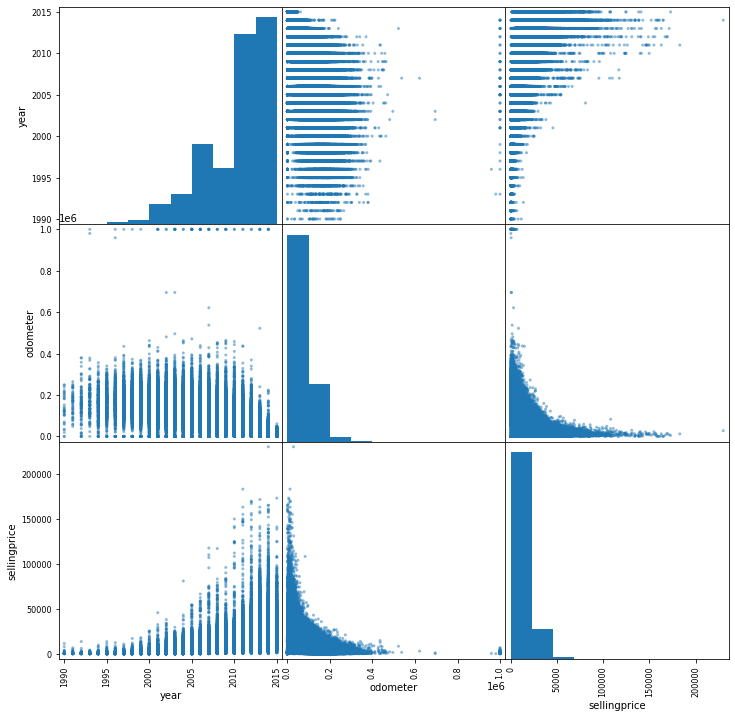

In [6]:
pd.plotting.scatter_matrix(df, figsize=(12,12))
plt.show()

In [7]:
df['year']=pd.to_datetime(df['year']).dt.year
df['condition']=pd.to_numeric(df['condition'],errors='ignore')
df['odometer']=pd.to_numeric(df['odometer'],errors='coerce')
df['mmr']=pd.to_numeric(df['mmr'],errors='coerce')
df['sellingprice']=pd.to_numeric(df['sellingprice'],errors='ignore')

In [8]:
#There are many duplicates in make column like case duplicates, tk and truck were added into column names
df['make']=df['make'].str.lower()     #Convert into lowercase
df['make']=df['make'].str.replace('tk','')   #replacing tk with empty string
df['make']=df['make'].str.replace(' ','')    #replacing space with empty string
df['make']=df['make'].str.replace('truck','')    #replacing truck with empty string
df['make']=df['make'].str.strip()      #removing extra spaces
df['make'].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'cadillac', 'acura', 'lexus', 'hyundai', 'buick', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'landrover', 'lincoln', 'jaguar', 'volkswagen', 'toyota', 'subaru',
       'scion', 'porsche', 'dodge', 'fiat', 'chrysler', 'ferrari',
       'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac', 'saturn',
       'maserati', 'mercury', 'hummer', 'saab', 'suzuki', 'oldsmobile',
       'rolls-royce', 'isuzu', 'plymouth', 'tesla', 'astonmartin', 'geo',
       'fisker', 'daewoo', 'lamborghini', 'lotus'], dtype=object)

In [9]:
df['transmission']=df['transmission'].replace('Sedan','sedan') 

In [10]:
df=df.drop(columns='vin',axis=1)

In [11]:
cetegorical_features=['make','model','body','color','interior','transmission']
encoder=LabelEncoder()
df[cetegorical_features] = df[cetegorical_features].apply(encoder.fit_transform)

### Correlation

In [12]:
df.corr()

,year,make,model,body,transmission,odometer,color,interior,mmr,sellingprice
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
make,NaN,1.000000,0.050447,0.039943,0.046207,-0.027674,-0.002578,-0.003267,-0.060192,-0.058453
model,NaN,0.050447,1.000000,-0.012009,0.014410,0.062636,0.004408,0.011527,-0.003597,-0.003213
body,NaN,0.039943,-0.012009,1.000000,-0.063285,-0.014166,-0.000967,-0.001507,-0.040206,-0.037844
transmission,NaN,0.046207,0.014410,-0.063285,1.000000,0.031508,-0.022285,-0.020095,-0.043743,-0.046003
odometer,NaN,-0.027674,0.062636,-0.014166,0.031508,1.000000,-0.036700,0.164795,-0.582648,-0.577363
color,NaN,-0.002578,0.004408,-0.000967,-0.022285,-0.036700,1.000000,0.023311,0.011533,0.017571
interior,NaN,-0.003267,0.011527,-0.001507,-0.020095,0.164795,0.023311,1.000000,-0.123567,-0.123292
mmr,NaN,-0.060192,-0.003597,-0.040206,-0.043743,-0.582648,0.011533,-0.123567,1.000000,0.983492
sellingprice,NaN,-0.058453,-0.003213,-0.037844,-0.046003,-0.577363,0.017571,-0.123292,0.983492,1.000000


Text(0, 0.5, 'Selling Price')

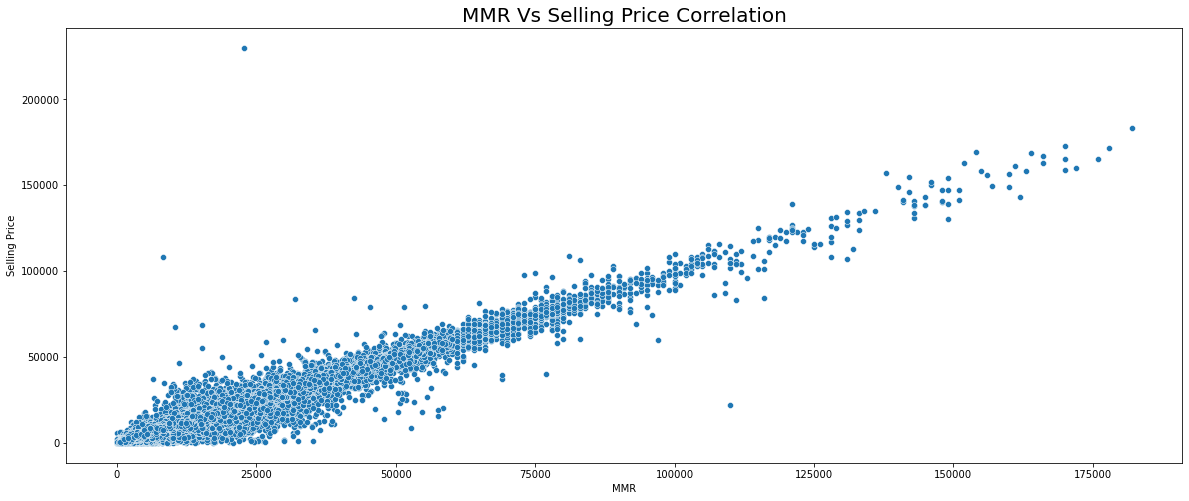

In [13]:
#Correlation between MMR and Selling price
plt.figure(figsize=(20,8))
g=sns.scatterplot(x='mmr',y='sellingprice',data=df)
g.set_title('MMR Vs Selling Price Correlation',fontsize=20)
g.set_xlabel('MMR',fontsize=10)
g.set_ylabel('Selling Price',fontsize=10)

In [14]:
df['mmr'].corr(df['sellingprice'])

0.9834919120611104

In [15]:
df=df.dropna()

# Interpretation

## Using the full dataset, create an OLS regression model using statsmodels.

In [16]:
import statsmodels.api as smf

X=df.drop('sellingprice',axis=1)
y=df['sellingprice']

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

olsModel = smf.OLS(y, X).fit()
print(olsModel.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.691e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:53:34   Log-Likelihood:            -4.1504e+06
No. Observations:              472336   AIC:                         8.301e+06
Df Residuals:                  472325   BIC:                         8.301e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
year            -1.6479      0.009   -177.409   

/Users/pragathi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [17]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [18]:
reg.score(X,y)

0.972826745079522

## Which variables are significant and which are insignificant?

## What is the overall explanatory power of the model? 

This is pretty good model, Here transmission and condition are the most important features

## Are there concerns about the residual distribution? Explain what you are seeing and provide any supporting charts.

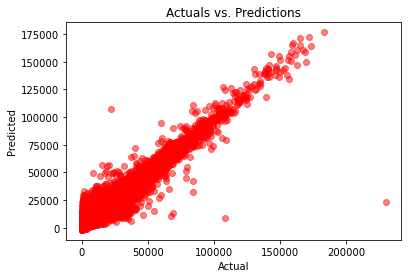

In [19]:
yhat = reg.predict(X)

plt.plot(y, yhat, 'ro', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actuals vs. Predictions')
plt.show()

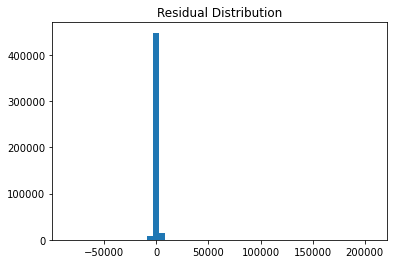

In [20]:
yhat_residuals = y - yhat

plt.hist(yhat_residuals, bins=50)
plt.title('Residual Distribution')
plt.show()

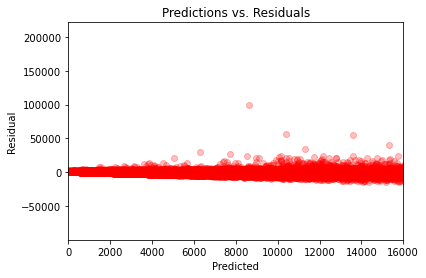

In [21]:
plt.plot(yhat, yhat_residuals, 'ro', alpha=0.25)
plt.hlines(0,0,16000)
plt.xlim(0,16000)
plt.title('Predictions vs. Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

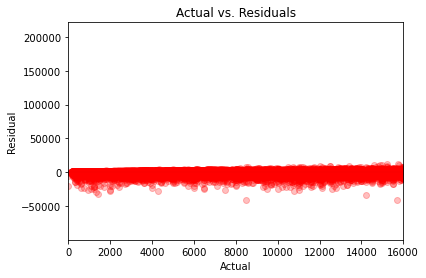

In [22]:
plt.plot(y, yhat_residuals, 'ro', alpha=0.25)
plt.hlines(0,0,16000)
plt.xlim(0,16000)
plt.title('Actual vs. Residuals')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

# Prediction

## Using a simple training and test split, split your data into two groups - one for modeling and another for evaluation.

In [23]:
x=df.drop('sellingprice',axis=1)
y=df['sellingprice']


x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)

print(f'Training samples: {X_train.shape[0]}')
print(f'Test samples: {X_test.shape[0]}')

Training samples: 377868
Test samples: 94468


In [24]:
regTrain = LinearRegression()
regTrain.fit(X_train, y_train)

LinearRegression()

In [25]:
regTrain.score(X_train, y_train)

0.9728351898622006

In [26]:
regTrain.score(X_test, y_test)

0.9727909872397077

### OLS model for training dataset

In [27]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')

X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

olsModel = smf.OLS(y_train, X_train).fit()
print(olsModel.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.353e+06
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:53:38   Log-Likelihood:            -3.3209e+06
No. Observations:              377868   AIC:                         6.642e+06
Df Residuals:                  377857   BIC:                         6.642e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
year            -1.6475      0.010   -158.441   

/Users/pragathi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


### OLS model for test dataset

In [28]:
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')

X_test.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

olsModel = smf.OLS(y_test, X_test).fit()
print(olsModel.summary())

                            OLS Regression Results                            
Dep. Variable:           sellingprice   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 3.378e+05
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:53:38   Log-Likelihood:            -8.2957e+05
No. Observations:               94468   AIC:                         1.659e+06
Df Residuals:                   94457   BIC:                         1.659e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
year            -1.6496      0.021    -79.810   

/Users/pragathi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [30]:
polys = ['make', 'model', 'body', 'transmission','odometer','color','interior','mmr']
poly_pipeline = Pipeline([('standardize_polynomials', StandardScaler())])

processing_pipeline = ColumnTransformer(transformers=[('poly_processing', poly_pipeline, polys)])

print(processing_pipeline)

ColumnTransformer(transformers=[('poly_processing',
                                 Pipeline(steps=[('standardize_polynomials',
                                                  StandardScaler())]),
                                 ['make', 'model', 'body', 'transmission',
                                  'odometer', 'color', 'interior', 'mmr'])])


In [31]:
modeling_pipeline = Pipeline([('data_processing',processing_pipeline),('lm', LinearRegression())])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('poly_processing',
                                                  Pipeline(steps=[('standardize_polynomials',
                                                                   StandardScaler())]),
                                                  ['make', 'model', 'body',
                                                   'transmission', 'odometer',
                                                   'color', 'interior',
                                                   'mmr'])])),
                ('lm', LinearRegression())])

### Model Performance

In [32]:
modeling_pipeline.score(X_train, y_train)

0.9673904331127922

In [33]:
modeling_pipeline.score(X_test, y_test)

0.9671062641540957

### Is this overfitting or underfitting?

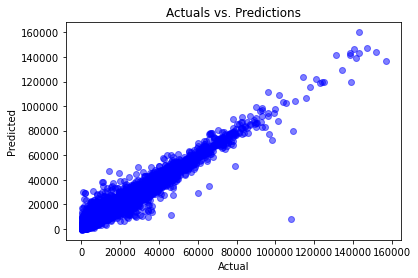

In [34]:
yhat_test = modeling_pipeline.predict(X_test)

plt.plot(y_test, yhat_test, 'bo', alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actuals vs. Predictions')
plt.show()

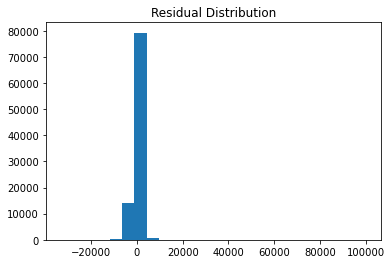

In [35]:
yhat_residuals = y_test - yhat_test

plt.hist(yhat_residuals, bins=25)
plt.title('Residual Distribution')
plt.show()

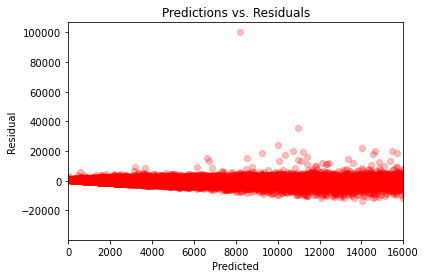

In [36]:
plt.plot(yhat_test, yhat_residuals, 'ro', alpha=0.25)
plt.hlines(0,0,16000)
plt.xlim(0,16000)
plt.title('Predictions vs. Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()


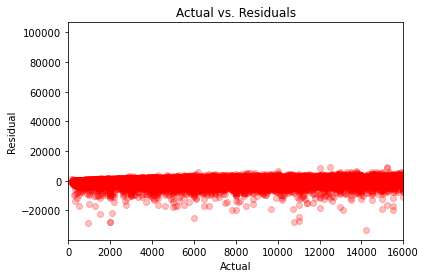

In [37]:
plt.plot(y_test, yhat_residuals, 'ro', alpha=0.25)
plt.hlines(0,0,16000)
plt.xlim(0,16000)
plt.title('Actual vs. Residuals')
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

# Observations

1. This was a perfect model, as the residuals are 0 for all actual/predicted values. 
2. Model is 96-97% accurate for full,train and test datasets


# Run a Ridge or Lasso regression with a few different levels of regularization strength. Does this help or hurt performance?

### Ridge regression

In [38]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=10000))])
modeling_pipeline_ridge.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('poly_processing',
                                                  Pipeline(steps=[('standardize_polynomials',
                                                                   StandardScaler())]),
                                                  ['make', 'model', 'body',
                                                   'transmission', 'odometer',
                                                   'color', 'interior',
                                                   'mmr'])])),
                ('ridge', Ridge(alpha=10000))])

In [39]:
modeling_pipeline_ridge.score(X_train, y_train)

0.9664663114040706

In [40]:
modeling_pipeline_ridge['ridge'].coef_

array([-2.19091454e+01,  2.04398967e+01, -5.24320346e+00, -3.49958422e+01,
       -2.61479074e+02,  5.38314027e+01, -2.59121779e+01,  9.06971190e+03])

In [41]:
from collections import defaultdict

alpha_values=[0,1,10,100,1000,10000,100000,1000000,10000000,1000000000]
#alpha_values = [1, 2, 5, 10, 50, 100, 200]
ridge_results = defaultdict(dict)
for i in alpha_values:
    modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=i))])
    modeling_pipeline_ridge.fit(X_train, y_train)
    print(modeling_pipeline_ridge.score(X_train, y_train))
    ridge_results['coefficients'][i] = modeling_pipeline_ridge['ridge'].coef_
    ridge_results['training score'][i] = modeling_pipeline_ridge.score(X_train, y_train)
    ridge_results['test score'][i] = modeling_pipeline_ridge.score(X_test, y_test)
    

0.9673904331127922
0.9673904331025223
0.9673904320859052
0.9673903305252488
0.9673802745889495
0.9664663114040706
0.9216862072451446
0.5211937544737673
0.09185748263632898
0.0009989684592611736


#### Increasing alpha values hurts the performance of the model

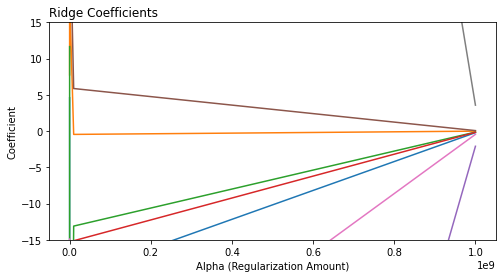

In [42]:
coefficients = pd.DataFrame.from_dict(ridge_results['coefficients'])
coefficients = coefficients.reset_index()
coefficients = coefficients.rename(columns={'index':'coefficient_nbr'})
coefficients = coefficients.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

(
coefficients.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient')
    .plot(figsize=(8,4),legend=False)
)

plt.title('Ridge Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.ylim((-15, 15))
plt.show()

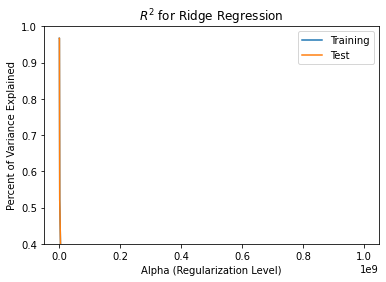

In [43]:
ridge_training_r2 = pd.Series(ridge_results['training score'])
ridge_test_r2 = pd.Series(ridge_results['test score'])

ridge_training_r2.plot()
ridge_test_r2.plot()
plt.title('$R^2$ for Ridge Regression')
plt.legend(['Training','Test'],loc=0)
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.ylim(0.4, 1)
plt.show()

### Lasso Regression

In [44]:
from sklearn.linear_model import Lasso
from collections import defaultdict

alphas = [0,1,5,10,50,100]

lasso_results = defaultdict(dict)

for i in alphas:
    modeling_pipeline_lasso = Pipeline([('data_processing', processing_pipeline), ('lasso', Lasso(alpha=i))])
    modeling_pipeline_lasso.fit(X_train, y_train)
    print(modeling_pipeline_lasso.score(X_train, y_train))
    lasso_results['coefficients'][i] = modeling_pipeline_lasso['lasso'].coef_
    lasso_results['training score'][i] = modeling_pipeline_lasso.score(X_train, y_train)
    lasso_results['test score'][i] = modeling_pipeline_lasso.score(X_test, y_test)

/Users/pragathi/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/Users/pragathi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/pragathi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 571059178816.0042, tolerance: 3502402719.982408
  model = cd_fast.enet_coordinate_descent(


0.9673904331127922
0.967390360477461
0.9673886343414421
0.9673843850662731
0.967318821934661
0.9672054048115595


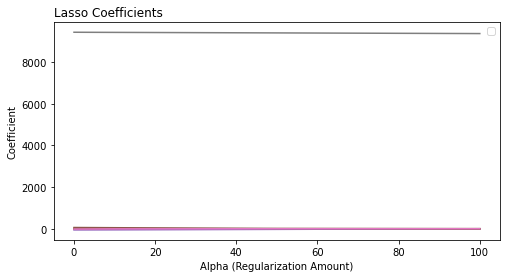

In [45]:
coefficients = pd.DataFrame.from_dict(lasso_results['coefficients'])
coefficients = coefficients.reset_index()
coefficients = coefficients.rename(columns={'index':'coefficient_nbr'})
coefficients = coefficients.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')
coefficients.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient').plot(figsize=(8,4))
plt.title('Lasso Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.legend('')
plt.show()

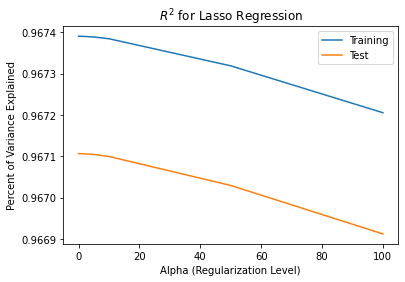

In [46]:
lasso_training_r2 = pd.Series(lasso_results['training score'])
lasso_test_r2 = pd.Series(lasso_results['test score'])

lasso_training_r2.plot()
lasso_test_r2.plot()
plt.title('$R^2$ for Lasso Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.show()